In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
data = pd.read_csv('heights.csv')
data.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [23]:
max_thershold = data['height'].quantile(0.95)
max_thershold

9.689999999999998

In [24]:
min_threshold = data['height'].quantile(0.05)
min_threshold

3.6050000000000004

In [25]:
data[(data['height']<max_thershold) & (data['height']>min_threshold)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [26]:
bhp = pd.read_csv('bhp.csv')
bhp.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [27]:
bhp.shape

(13200, 7)

In [28]:
bhp.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [29]:
min_threshold,max_thershold = bhp.price_per_sqft.quantile([0.001,0.999])
min_threshold,max_thershold

(1366.184, 50959.36200000098)

In [30]:
# Data remove the outlier....
df2 = bhp[(bhp.price_per_sqft<max_thershold) & (bhp.price_per_sqft>min_threshold)]

In [31]:
df2.shape

(13172, 7)

In [32]:
ab = pd.read_csv('AB_NYC_2019.csv')
ab.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [33]:
ab.shape

(48895, 16)

In [34]:
ab.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [35]:
min_threshold,max_thershold = ab.price.quantile([0.001,0.999])
min_threshold,max_thershold

(18.0, 3000.0)

In [37]:
df3 = ab[(ab.price<max_thershold) & (ab.price>min_threshold)]
df3.shape

(48792, 16)

In [38]:
dt = pd.read_csv('/content/height.csv')
dt.shape

(10000, 2)

In [40]:
dt.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [41]:
dt.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


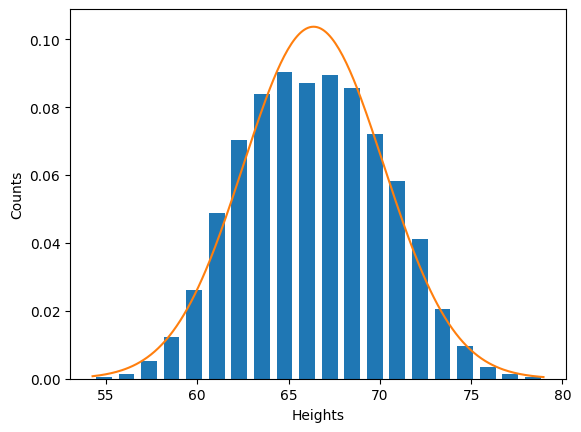

In [46]:
from scipy.stats import norm
plt.hist(dt.height,bins = 20,density=True,rwidth = 0.7)
plt.xlabel("Heights")
plt.ylabel("Counts")

rng = np.arange(dt.height.min(), dt.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,dt.height.mean(),dt.height.std()))

In [47]:
dt.height.mean()

66.367559754866

In [48]:
dt.height.std()

3.847528120795573

In [51]:
upper_limit = dt.height.mean() + 3*dt.height.std()

In [52]:
lower_limit = dt.height.mean() - 3*dt.height.std()

In [54]:
new_dt = dt[(dt.height<upper_limit) & (dt.height>lower_limit)]
new_dt.shape

(9993, 2)

In [55]:
#IQR........
Q1 = data.height.quantile(0.25)
Q3 = data.height.quantile(0.75)

In [57]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [59]:
lower_limits = Q1 - 1.5*IQR
upper_limits = Q3 + 1.5*IQR
lower_limits,upper_limits

(3.8625000000000003, 7.5625)

In [ ]:
new_df = data[(data.height<upper_limits) & (data.height>lower_limits)]
new_df

In [63]:
dw = pd.read_csv('/content/weight-height.csv')
dw.shape

(10000, 3)

In [64]:
dw.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Text(0, 0.5, 'Counts')

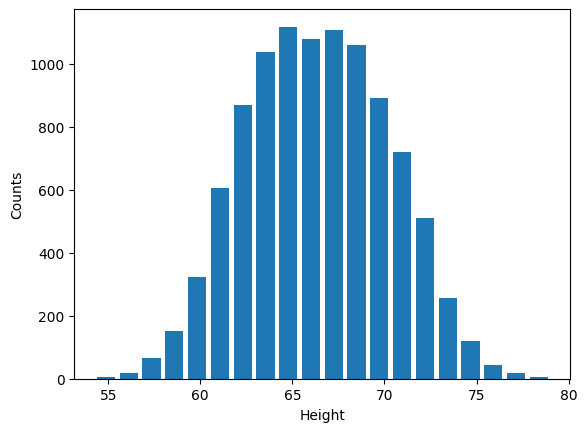

In [65]:
plt.hist(dw.Height,bins = 20,rwidth=0.8)
plt.xlabel("Height")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

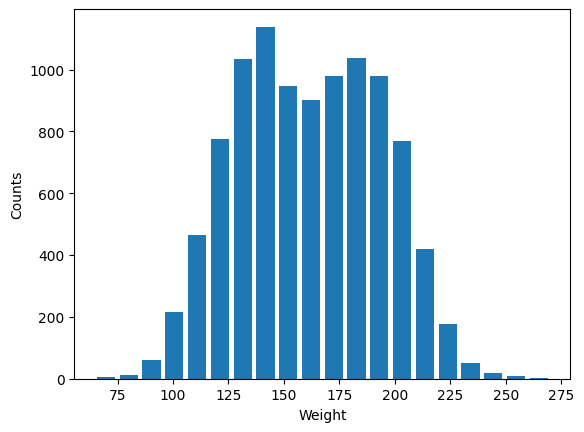

In [66]:
plt.hist(dw.Weight,bins = 20,rwidth=0.8)
plt.xlabel("Weight")
plt.ylabel("Counts")

In [67]:
Q1 = dw.Height.quantile(0.25)
Q3 = dw.Height.quantile(0.75)

In [68]:
IQR_dw = Q3 - Q1

In [69]:
upper_limit_dw = Q1 - 1.5*IQR_dw
lower_limit_dw = Q3 + 1.5*IQR_dw

In [70]:
dw[(dw.Height>lower_limit_dw) & (dw.Height<upper_limit_dw)]
dw.shape

(10000, 3)